In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from random import sample
from numpy.random import uniform

In [2]:
def Elbow_vis(ndf):
    k_max =15
    model = KMeans()
    vis = KElbowVisualizer(model, k=(2,k_max), metric='distortion', timings=False)
    vis.fit(ndf)  
    vis.show()

In [3]:
def Silhoulette_vis(ndf):
    k_max =15
    model = KMeans()
    vis = KElbowVisualizer(model, k=(2,k_max), metric='silhouette', timings=False)
    vis.fit(ndf)  
    vis.show()

In [4]:
def Elbow_Method(ndf):
    distortions = []
    max_k = 15
    for k in range(2, max_k):
        kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
        kmeans_iter.fit(ndf)
    
        distortions.append(kmeans_iter.inertia_)
        
    return distortions

In [5]:
def K_Silhoulette(ndf):
    sil_list = list()
    max_k = 15
    for k in range(2, max_k):
        kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
        kmeans_iter.fit(ndf)
        
        sil_list.append(silhouette_score(ndf, kmeans_iter.labels_))
        
    return sil_list

In [6]:
def plot_silhoulette(sil_list):
    # plot indicators
    plt.figure(figsize=(12, 8))
    plt.plot(range(2, len(sil_list) + 2), sil_list)
    plt.xlabel('K', fontsize=20)
    plt.ylabel('Silhouette', fontsize=18)
    plt.legend()
    plt.show()

In [7]:
def K_Means(k,ndf,sil_list):
    labels = []
    centers=[]
    norm_centers=[]
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=100, max_iter=1000)
    kmeans.fit(ndf)
    norm_centers.append(kmeans.cluster_centers_)
    centers.append(minmax_scaler.inverse_transform(kmeans.cluster_centers_)) # we store the coordinates of the centroids
    labels.append(kmeans.labels_) # we store the labels associated with the records
    print("SILHOUETTE:",sil_list[k-2])
    
    cluster_col = 'K_' + str(k) # it contains the name of the column containing the optimal labels
    #l = np.transpose(labels)
    #df[cluster_col] = l
    [centers]=centers
    
    return labels,centers,norm_centers,cluster_col

In [8]:
def ConvertClusterList(df,k_str):
    clust_list = list()
    for i in range(len(df[k_str].unique())):
        clust_list.append(df[df[k_str] == i])
        
    return clust_list

In [63]:
def single_silhouette_score_5(ndf,labels_k,idx):
    if idx>0:
        [labels_k[idx]]=labels_k[idx]
        sample_silhouette_values = silhouette_samples(ndf, labels_k[idx])
    else:
        sample_silhouette_values = silhouette_samples(ndf, labels_k)
    sample_values_k0=[]
    sample_values_k1=[]
    sample_values_k2=[]
    sample_values_k3=[]
    sample_values_k4=[]
    if idx>0:
        for i in range(0,len(sample_silhouette_values)):
            if labels_k[idx][i]==0:
                sample_values_k0.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==1:
                sample_values_k1.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==2:
                sample_values_k2.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==3:
                sample_values_k3.append(sample_silhouette_values[i])
            else:
                sample_values_k4.append(sample_silhouette_values[i])
    else:
        for i in range(0,len(sample_silhouette_values)):
            if labels_k[i]==0:
                sample_values_k0.append(sample_silhouette_values[i])
            elif labels_k[i]==1:
                sample_values_k1.append(sample_silhouette_values[i])
            elif labels_k[i]==2:
                sample_values_k2.append(sample_silhouette_values[i])
            elif labels_k[i]==3:
                sample_values_k3.append(sample_silhouette_values[i])
            else:
                sample_values_k4.append(sample_silhouette_values[i])
            
    print(np.mean(sample_values_k0))
    print(np.mean(sample_values_k1))
    print(np.mean(sample_values_k2))
    print(np.mean(sample_values_k3))
    print(np.mean(sample_values_k4))

In [58]:
def single_silhouette_score_4(ndf,labels_k,idx):
    if idx>0:
        [labels_k[idx]]=labels_k[idx]
        sample_silhouette_values = silhouette_samples(ndf, labels_k[idx])
    else:
        sample_silhouette_values = silhouette_samples(ndf, labels_k)
        
    sample_values_k0=[]
    sample_values_k1=[]
    sample_values_k2=[]
    sample_values_k3=[]
    if idx>0:
        for i in range(0,len(sample_silhouette_values)):
            if labels_k[idx][i]==0:
                sample_values_k0.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==1:
                sample_values_k1.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==2:
                sample_values_k2.append(sample_silhouette_values[i])
            else:
                sample_values_k3.append(sample_silhouette_values[i])
    else:
        for i in range(0,len(sample_silhouette_values)):
            if labels_k[i]==0:
                sample_values_k0.append(sample_silhouette_values[i])
            elif labels_k[i]==1:
                sample_values_k1.append(sample_silhouette_values[i])
            elif labels_k[i]==2:
                sample_values_k2.append(sample_silhouette_values[i])
            else:
                sample_values_k3.append(sample_silhouette_values[i])
            
    print(np.mean(sample_values_k0))
    print(np.mean(sample_values_k1))
    print(np.mean(sample_values_k2))
    print(np.mean(sample_values_k3))

In [11]:
def single_silhouette_score_3(ndf,labels_k,idx):
    [labels_k[idx]]=labels_k[idx]
    sample_silhouette_values = silhouette_samples(ndf, labels_k[idx])
    sample_values_k0=[]
    sample_values_k1=[]
    sample_values_k2=[]
    for i in range(0,len(sample_silhouette_values)):
        if labels_k[idx][i]==0:
            sample_values_k0.append(sample_silhouette_values[i])
        elif labels_k[idx][i]==1:
            sample_values_k1.append(sample_silhouette_values[i])
        else:
            sample_values_k2.append(sample_silhouette_values[i])
            
    print(np.mean(sample_values_k0))
    print(np.mean(sample_values_k1))
    print(np.mean(sample_values_k2))

In [12]:
def plot_silhoulette_clusters(ndf,labels,k):
    plt.figure(figsize = (12,6))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    plt.xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(ndf) + (k + 1) * 10])
    
    silhouette_avg = silhouette_score(ndf, labels)
    sample_silhouette_values = silhouette_samples(ndf, labels)

    y_lower = 10
    bar_colors = []
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.cividis(float(i) / k)
        bar_colors.append(color)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters. Avg Sil = " + '{:.4f}'.format(silhouette_avg))
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [13]:
def plot_Histograms(df,clust_list):
    attr = df.columns
    num_elements = 4
    clusters = range(len(clust_list))
    fig, axs = plt.subplots(math.ceil(len(attr) / num_elements),num_elements,figsize=(15,8))
    for attr_index in range(len(attr)):
        mean_values = []
        for cluster_df in clust_list:
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        axs[int(attr_index / num_elements)][attr_index % num_elements].bar(clusters, mean_values, color = ['b','y','g','r'])
        axs[int(attr_index / num_elements)][attr_index % num_elements].set_title(f"{attr[attr_index]} - Mean")

In [14]:
def plot_parallelCoordinates(centers,df):
    plt.figure(figsize=(28, 10))
    for i in range(0, len(centers)):
        plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.xticks(range(0, len(df.columns)), df.columns, fontsize=15)
    plt.legend(fontsize=10)
    plt.show()

In [15]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
     
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
      
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [16]:
df = pd.read_csv('../dataset/customer/new_Customer_2009.csv', sep=',', index_col=0)
df

MeanProdSale  TotalSale  TotalProd  MeanSpentSession  \
Customer ID                                                         
13085.0          3.425000    1096.80        376        274.200000   
13078.0          3.999608    2278.30        735        379.716667   
15362.0          3.628261     310.75        145        310.750000   
18102.0          2.979091   41005.74      14084       4556.193333   
12682.0          3.172927     964.95        409        321.650000   
...                   ...        ...        ...               ...   
18190.0          1.245625     192.42        240        192.420000   
13082.0          1.330000     192.18        210         96.090000   
15064.0          6.474762     324.99        126        324.990000   
14151.0          3.276957     352.05        176        352.050000   
12539.0          3.289710    5149.06       2128       2574.530000   

             MeanProdSession  TotalProdRet  MinProdSpent  MaxProdSpent  \
Customer ID                                                              
13085.0            94.000000             0         15.00        100.80   
13078.0           122.500000            13         10.00        130.80   
15362.0           145.000000             0          7.80         17.90   
18102.0          1564.888889             0         27.44       1800.00   
12682.0           136.333333             0          7.80        124.95   
...                      ...           ...           ...           ...   
18190.0           240.000000             0          5.04         19.80   
13082.0           105.000000             0         12.72        101.76   
15064.0           126.000000             0          5.04         50.00   
14151.0           176.000000             0         10.20         23.40   
12539.0          1064.000000             0          5.04        107.40   

             MeanTimeGap  Nsessions  DistinctProd  
Customer ID                                        
13085.0        19.666667        4.0          18.0  
13078.0        68.400000        4.0          34.0  
15362.0         0.000000        1.0          23.0  
18102.0        43.000000        9.0          51.0  
12682.0       171.500000        3.0          36.0  
...                  ...        ...           ...  
18190.0         0.000000        1.0          16.0  
13082.0         0.000000        2.0           3.0  
15064.0         0.000000        1.0          21.0  
14151.0         0.000000        1.0          23.0  
12539.0         0.000000        2.0         104.0  

[949 rows x 11 columns]

In [17]:
#selected_features = ['TotalProd','MeanProdSession', 'MeanSpentSession', 'MeanProdSale']
#selected_features = ['TotalProd', 'MeanTimeGap','TotalSale']
selected_features = ['Nsessions', 'MeanTimeGap','TotalSale']
#selected_features = ['Nsessions', 'MeanTimeGap','MeanSpentSession']
df_aux = df[selected_features]
df_aux.head()

Nsessions  MeanTimeGap  TotalSale
Customer ID                                   
13085.0            4.0    19.666667    1096.80
13078.0            4.0    68.400000    2278.30
15362.0            1.0     0.000000     310.75
18102.0            9.0    43.000000   41005.74
12682.0            3.0   171.500000     964.95

<h2>Clustering tendency</h2>

In [71]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(df_aux)
    l.append(H)
#print average value:
np.mean(l)

0.9860328591943904

<h2>Normalization</h2>

In [18]:
minmax_scaler = MinMaxScaler(feature_range = (0, 1)) # MinMaxScaler
df_norm_minmax = minmax_scaler.fit_transform(df_aux.to_numpy())
ndf = pd.DataFrame(df_norm_minmax, columns=df_aux.columns)

In [73]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([ndf['Nsessions'],ndf['TotalSale'],ndf['MeanTimeGap']])
 
# show plot
plt.show()

<h2>K-Means</h2>

<h2>Elbow method</h2>

Initially we perform the elbow method to find the number of clusters

In [74]:
Elbow_vis(ndf)

The optimal k is 5 but the distortion score is very low, so we move to analize the quality of clusters using the silhoulette method

<h2>silhoulette method</h2>

In [19]:
sil_list_09=K_Silhoulette(ndf)
#Silhoulette_vis(ndf)
#plot_elbow(distortions_09)
plot_silhoulette(sil_list_09)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [20]:
k_list=[2,3,4,5]
labels_k=[]
centers_k=[]
norm_centers_k=[]
cluster_col_k=[]

for i in k_list:
    labels,centers,norm_centers,cluster_col=K_Means(i,ndf,sil_list_09)
    labels_k.append(labels)
    centers_k.append(centers)
    norm_centers_k.append(norm_centers)
    cluster_col_k.append(cluster_col)
    
clust_list_09_k=[]
for i in range(0,len(k_list)):
    data=df.copy()
    l = np.transpose(labels_k[i])
    data[cluster_col_k[i]]=l
    clust_list_09=ConvertClusterList(data,cluster_col_k[i])
    clust_list_09_k.append(clust_list_09)
    del data

SILHOUETTE: 0.757067174199368
SILHOUETTE: 0.7691799179524055
SILHOUETTE: 0.7975028829331381
SILHOUETTE: 0.779834488927605


In [21]:
f, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

axs[0].bar(['Cluster 0','Cluster 1'], [len(clust_list_09_k[0][0]), len(clust_list_09_k[0][1])], color=['#00224e','#7d7c78'])
axs[0].set_xlabel('Clusters')
axs[0].set_ylabel('Number of records')

axs[1].bar(['Cluster 0','Cluster 1','Cluster 2'], [len(clust_list_09_k[1][0]),len(clust_list_09_k[1][1]),len(clust_list_09_k[1][2])], color=['#00224e','#7d7c78','#00321a'])
axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Number of records')

axs[2].bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], [len(clust_list_09_k[2][0]),len(clust_list_09_k[2][1]),len(clust_list_09_k[2][2]),len(clust_list_09_k[2][3])], color=['#00224e','#7d7c78','#00321a','#11127c'])
axs[2].set_xlabel('Clusters')
axs[2].set_ylabel('Number of records')

axs[3].bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'], [len(clust_list_09_k[3][0]),len(clust_list_09_k[3][1]),len(clust_list_09_k[3][2]),len(clust_list_09_k[3][3]),len(clust_list_09_k[3][4])], color=['#00224e','#7d7c78','#00321a','#11127c','#11224e'])
axs[3].set_xlabel('Clusters')
axs[3].set_ylabel('Number of records')

plt.show()

In [78]:
print(len(clust_list_09_k[3][0]))
print(len(clust_list_09_k[3][1]))
print(len(clust_list_09_k[3][2]))
print(len(clust_list_09_k[3][3]))
print(len(clust_list_09_k[3][4]))

97
681
50
103
18


In [39]:
print(len(clust_list_09_k[2][0]))
print(len(clust_list_09_k[2][1]))
print(len(clust_list_09_k[2][2]))
print(len(clust_list_09_k[2][3]))

692
58
170
29


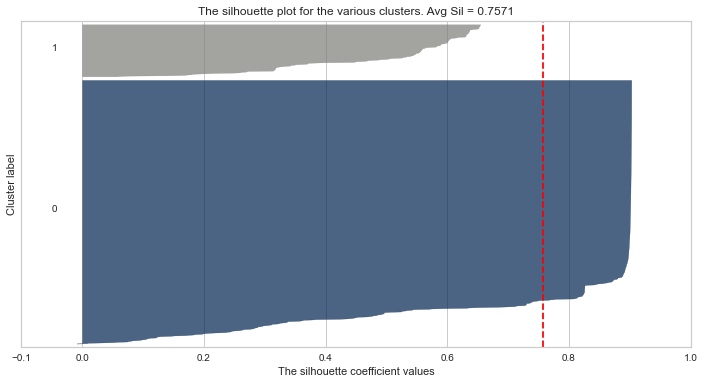

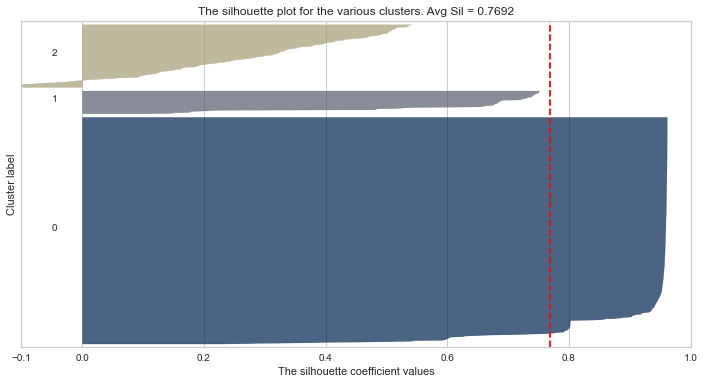

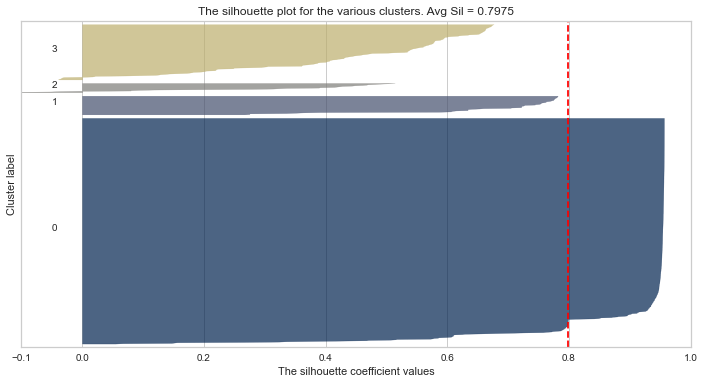

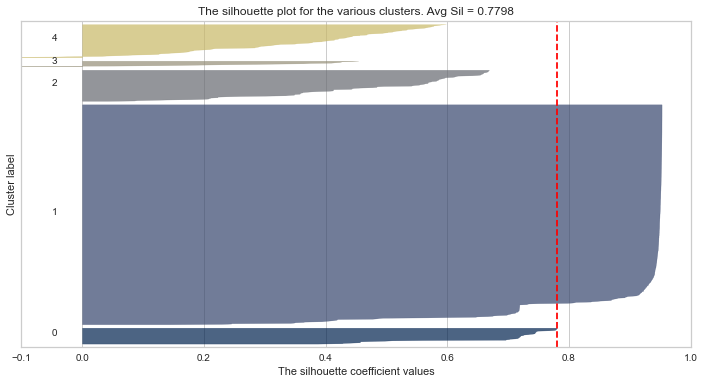

In [22]:
for i in k_list:
    labels_opt=labels_k[i-2]
    [labels_opt]=labels_opt
    plot_silhoulette_clusters(ndf,labels_opt,i)

In [27]:
k_opt=4

In [28]:
#[norm_centers_k]=norm_centers_k
[norm_centers_k[k_opt-2]]=norm_centers_k[k_opt-2]

In [29]:
plot_parallelCoordinates(norm_centers_k[k_opt-2],df_aux)

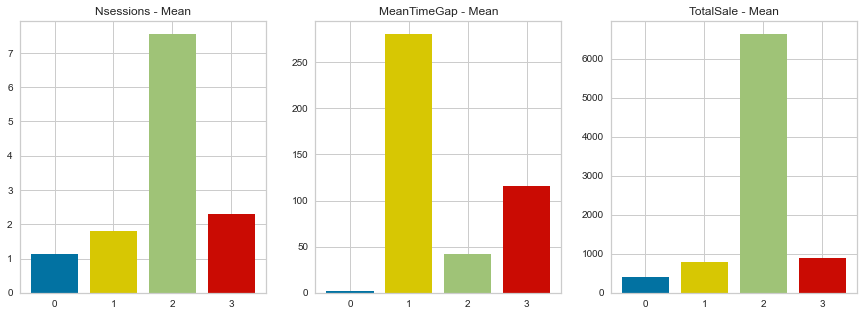

In [31]:
attr = df_aux.columns
clusters = range(len(clust_list_09_k[k_opt-2]))
fig, axs = plt.subplots(1,3,figsize=(15,5))
for attr_index in range(len(attr)):
    mean_values = []
    for cluster_df in clust_list_09_k[k_opt-2]:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
    axs[attr_index].bar(clusters, mean_values, color = ['b','y','g','r'])
    axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

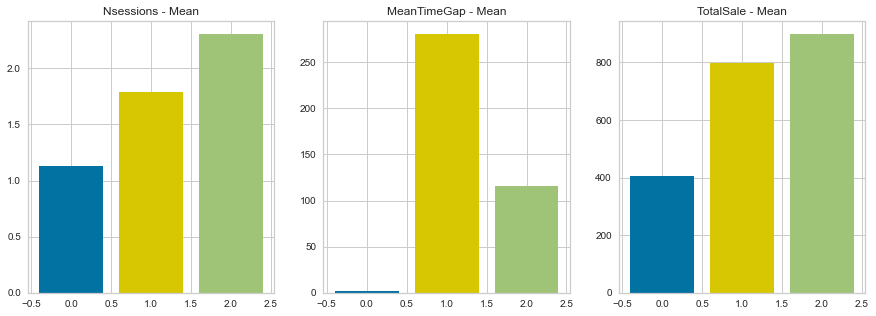

In [33]:
attr = df_aux.columns
#num_elements = 4
clusters = range(len(clust_list_09_k[k_opt-2])-1)
fig, axs = plt.subplots(1,3,figsize=(15,5))
for attr_index in range(len(attr)):
    mean_values = []
    cont=0
    for cluster_df in clust_list_09_k[k_opt-2]:
        if cont!=2:
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
            
        cont+=1
    axs[attr_index].bar(clusters, mean_values, color = ['b','y','g','r'])
    axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

In [34]:
single_silhouette_score_4(ndf,labels_k,2)

0.9167065256399564
0.6674863792517153
0.2845362013348507
0.44413859014934187


<h3>OPTICS</h3>

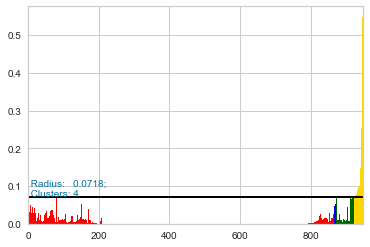

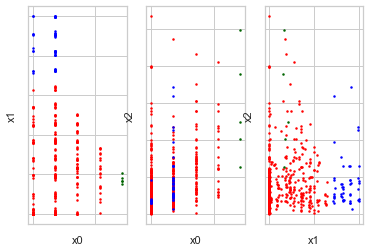

In [12]:
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
# Read sample for clustering from some file
sample = df_norm_minmax.tolist()

# Run cluster analysis where connectivity radius is bigger than real
radius = 2.0
neighbors = 3
amount_of_clusters = 4
optics_instance = optics(sample, radius, neighbors, amount_of_clusters)

# Performs cluster analysis
optics_instance.process()

# Obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

# Visualize ordering diagram
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, amount_of_clusters)

# Visualize clustering results
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, sample)
visualizer.show()

<h2>DBSCAN</h2>

In [13]:
from scipy.spatial.distance import pdist, squareform

In [14]:
dist = pdist(X=df_norm_minmax, metric='euclidean')  # pair-wise distance: how every record is far from all others
dist = squareform(dist)                      # distance matrix given the vector dist

In [21]:
kth_distances={4:[],6:[],8:[],10:[],12:[]}
for d in dist:
    # argsort returns the indexes that would sort d
    indexes_to_sort_d = np.argsort(d)
    for k in kth_distances:
        # append to kth_distances[k] the value in d that corresponds
        # to the distance of the i-th point (record) from its k-th nn.
        # it's like: kth_distances[k].append(sorted_d[k])), but we get "sorted_d[k]" by d[indexes_to_sort_d[k]]
        kth_distances[k].append(d[indexes_to_sort_d[k]])

In [26]:
plt.figure(figsize=(50, 20))
for k in kth_distances.keys():
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
plt.ylim(top=0.4)
plt.axhline(y=0.1, color='red', linestyle='--', linewidth=5)
plt.ylabel('k-th nn distances (eps)', fontsize=40)
plt.xlabel('indexes of the list of the sorted pairwise distances', fontsize=40)
plt.xticks(rotation=-45, fontsize=40)
plt.yticks(fontsize=40)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [27]:
kth_distances={15:[],20:[],25:[],30:[],35:[]}
for d in dist:
    # argsort returns the indexes that would sort d
    indexes_to_sort_d = np.argsort(d)
    for k in kth_distances:
        # append to kth_distances[k] the value in d that corresponds
        # to the distance of the i-th point (record) from its k-th nn.
        # it's like: kth_distances[k].append(sorted_d[k])), but we get "sorted_d[k]" by d[indexes_to_sort_d[k]]
        kth_distances[k].append(d[indexes_to_sort_d[k]])

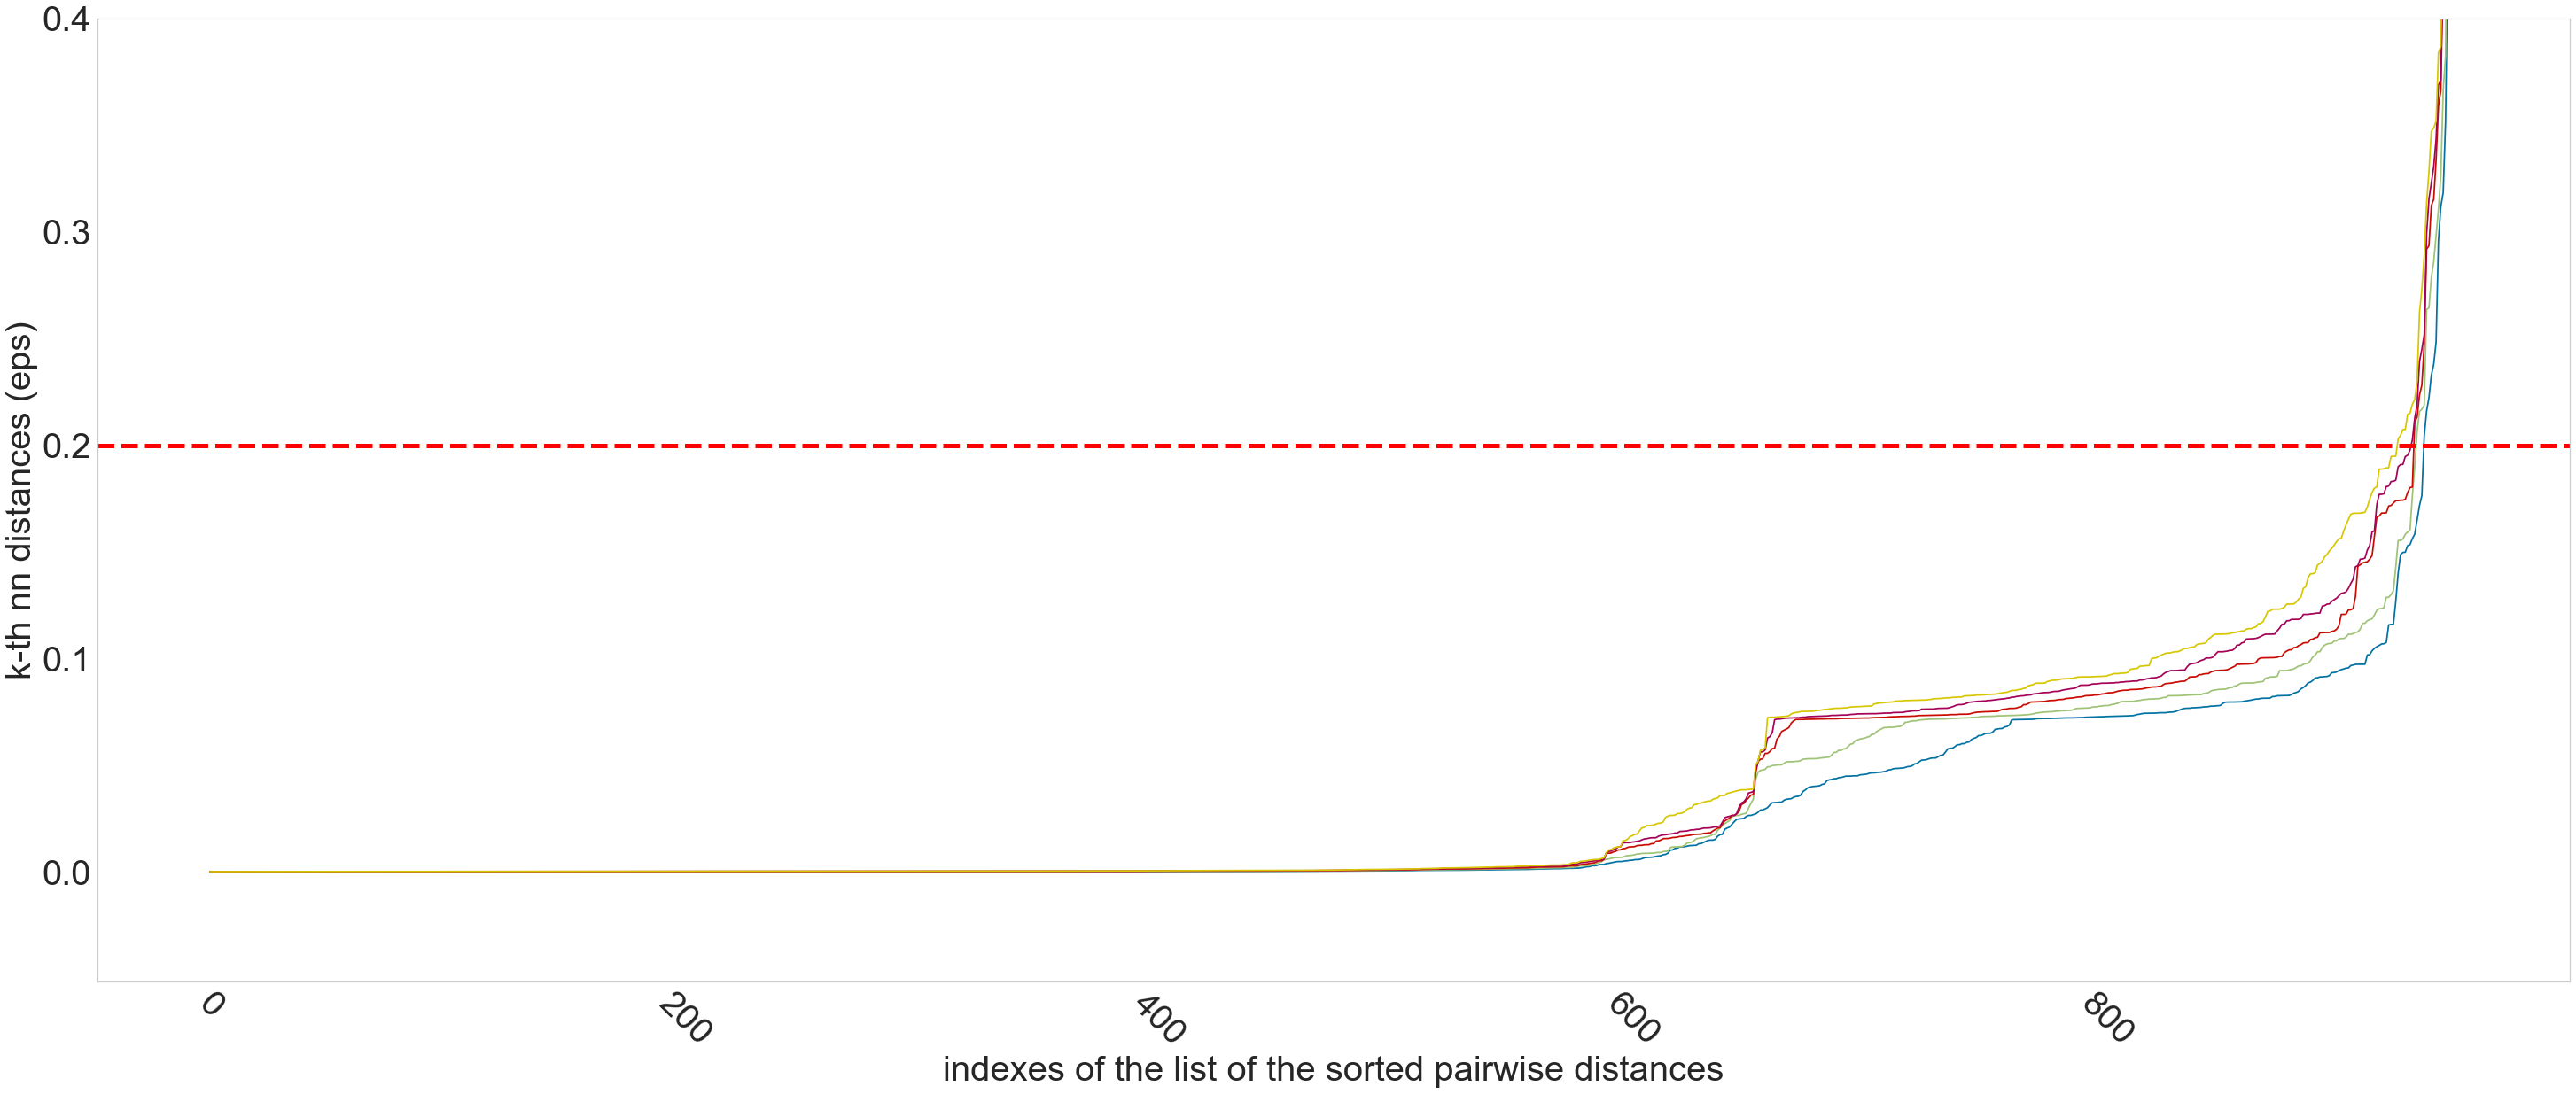

In [30]:
plt.figure(figsize=(50, 20))
for k in kth_distances.keys():
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
plt.ylim(top=0.4)
plt.axhline(y=0.2, color='red', linestyle='--', linewidth=5)
plt.ylabel('k-th nn distances (eps)', fontsize=40)
plt.xlabel('indexes of the list of the sorted pairwise distances', fontsize=40)
plt.xticks(rotation=-45, fontsize=40)
plt.yticks(fontsize=40)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [44]:
eps_to_test =[0.01, 0.013,0.016,0.02,0.023,0.026,0.03,0.033,0.036,0.04,0.043,0.046,0.05,0.053,0.056,0.06,0.063,0.066,0.07]
min_samples_to_test=[4,6,8,10,12,14,16,18,20,22,25]

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.01, 0.013, 0.016, 0.02, 0.023, 0.026, 0.03, 0.033, 0.036, 0.04, 0.043, 0.046, 0.05, 0.053, 0.056, 0.06, 0.063, 0.066, 0.07]
MIN_SAMPLES: [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 25]


In [45]:
#Verrà eseguita prima la clusterizzazione e poi il calcolo delle metriche:
#Distanza media tra i noise points e i 6 punti più vicini (6-NN)
#Numero di cluster che vengono individuati 

def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    score=silhouette_score(dataset,dbscan_model_.labels_)
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters, score)

In [46]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sulla silhoette
results_score = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [47]:
#grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric, score = get_metrics(eps, min_samples, ndf, iter_)
        print(score)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric
        results_score.loc[eps, min_samples]=score

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.01 and min_samples =   4 | 0.048   21
0.5747861509750912
  2 | Tested with eps = 0.01 and min_samples =   6 | 0.038    8
0.4757992179025186
  3 | Tested with eps = 0.01 and min_samples =   8 | 0.033    4
0.4655836086952774
  4 | Tested with eps = 0.01 and min_samples =  10 | 0.032    3
0.468752688348302
  5 | Tested with eps = 0.01 and min_samples =  12 | 0.031    2
0.6020934014233654
  6 | Tested with eps = 0.01 and min_samples =  14 | 0.031    2
0.5985257582476332
  7 | Tested with eps = 0.01 and min_samples =  16 | 0.031    2
0.5985257582476332
  8 | Tested with eps = 0.01 and min_samples =  18 | 0.031    2
0.5985257582476332
  9 | Tested with eps = 0.01 and min_samples =  20 | 0.031    2
0.5985257582476332
 10 | Tested with eps = 0.01 and min_samples =  22 | 0.031    2
0.5966559109989785
 11 | Tested with eps = 0.01 and min_sa

 99 | Tested with eps = 0.036 and min_samples =  25 | 0.033    2
0.6314145479674861
100 | Tested with eps = 0.04 and min_samples =   4 | 0.109   18
0.6158092442415769
101 | Tested with eps = 0.04 and min_samples =   6 | 0.081   15
0.6253959195997167
102 | Tested with eps = 0.04 and min_samples =   8 | 0.065   12
0.5930147805608921
103 | Tested with eps = 0.04 and min_samples =  10 | 0.049    8
0.5285121503042258
104 | Tested with eps = 0.04 and min_samples =  12 | 0.045    8
0.5561294925450078
105 | Tested with eps = 0.04 and min_samples =  14 |  0.04    6
0.5400492508630699
106 | Tested with eps = 0.04 and min_samples =  16 |  0.04    6
0.538483303815365
107 | Tested with eps = 0.04 and min_samples =  18 | 0.036    4
0.5223315101493171
108 | Tested with eps = 0.04 and min_samples =  20 | 0.033    2
0.6318798419497644
109 | Tested with eps = 0.04 and min_samples =  22 | 0.033    2
0.6318798419497644
110 | Tested with eps = 0.04 and min_samples =  25 | 0.033    2
0.6318798419497644
111 

198 | Tested with eps = 0.066 and min_samples =  25 |  0.04    5
0.5201224193767293
199 | Tested with eps = 0.07 and min_samples =   4 | 0.137   11
0.5786435310592449
200 | Tested with eps = 0.07 and min_samples =   6 | 0.125   10
0.5821352046097032
201 | Tested with eps = 0.07 and min_samples =   8 | 0.097    9
0.5703241800614697
202 | Tested with eps = 0.07 and min_samples =  10 | 0.071    7
0.5563266705431047
203 | Tested with eps = 0.07 and min_samples =  12 | 0.061    6
0.5523704134414069
204 | Tested with eps = 0.07 and min_samples =  14 | 0.049    3
0.5627317906747086
205 | Tested with eps = 0.07 and min_samples =  16 | 0.048    4
0.5775472941740806
206 | Tested with eps = 0.07 and min_samples =  18 | 0.048    5
0.5465151763367481
207 | Tested with eps = 0.07 and min_samples =  20 | 0.046    4
0.5742353116772371
208 | Tested with eps = 0.07 and min_samples =  22 | 0.046    5
0.5630982815872263
209 | Tested with eps = 0.07 and min_samples =  25 |  0.04    5
0.5249852270297991


In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,8))
sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("Number of clusters")
sns.heatmap(results_score, annot=True, ax=ax3, cbar=False).set_title("Silhouette score")
ax1.set_xlabel("min_samples")
ax2.set_xlabel("min_samples")
ax3.set_xlabel("min_samples")
ax1.set_ylabel("epsilon")
ax2.set_ylabel("epsilon")
ax2.set_ylabel("epsilon")
plt.show()

In [56]:
dbscan_model = DBSCAN( eps = 0.066, min_samples = 20)
dbscan_model.fit(ndf)

DBSCAN(eps=0.066, min_samples=20)

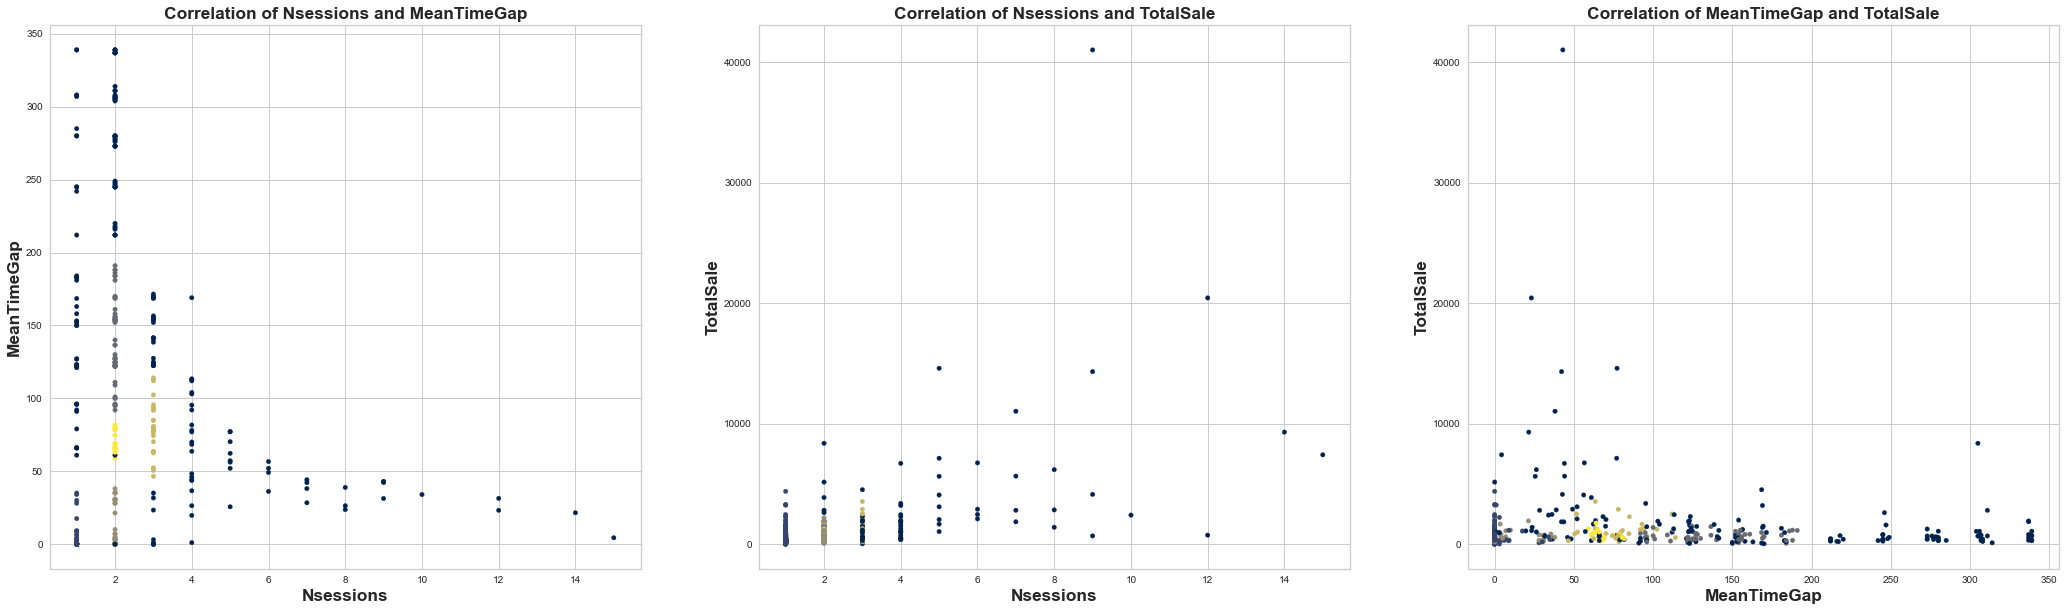

In [73]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(36,10))
index = 0
for i in range(0,len(df_aux.columns)):
    for j in range(i+1,len(df_aux.columns)):
        axs[index].scatter(df_aux[df_aux.columns[i]], df_aux[df_aux.columns[j]], c=dbscan_model.labels_, s=20, cmap=cm.cividis)
        axs[index].set_title('Correlation of ' + df_aux.columns[i] + ' and ' + df_aux.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        axs[index].set_xlabel(df_aux.columns[i], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        axs[index].set_ylabel(df_aux.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        index = index + 1

In [74]:
df_aux['LABEL']=dbscan_model.labels_

<ipython-input-74-0a6dfb3bde5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['LABEL']=dbscan_model.labels_


In [75]:
clust_list_dbscan = list()
for i in range(len(df_aux['LABEL'].unique())):
    clust_list_dbscan.append(df_aux[df_aux['LABEL'] == i])

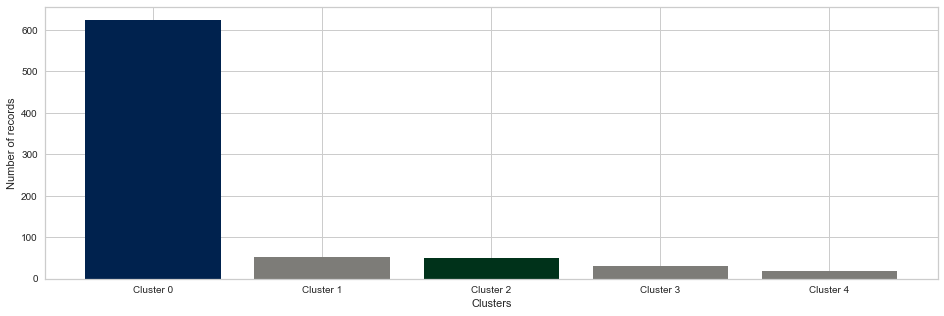

624
53
50
30
18


In [76]:
#0.5 5
plt.figure(figsize=(16, 5))
#f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'], [len(clust_list_dbscan[0]),len(clust_list_dbscan[1]),len(clust_list_dbscan[2]),len(clust_list_dbscan[3]),len(clust_list_dbscan[4])], color=['#00224e','#7d7c78','#00321a','#7d7c78','#7d7c78'])
plt.xlabel('Clusters')
plt.ylabel('Number of records')
plt.show()

print(len(clust_list_dbscan[0]))
print(len(clust_list_dbscan[1]))
print(len(clust_list_dbscan[2]))
print(len(clust_list_dbscan[3]))
print(len(clust_list_dbscan[4]))


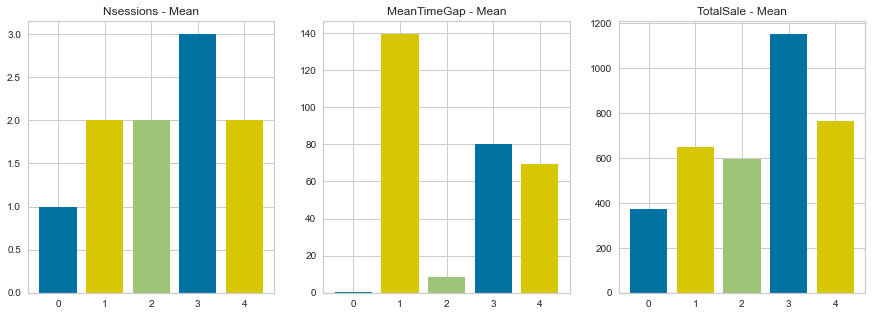

In [77]:
attr = df_aux.columns
#num_elements = 4
clusters = range(len(clust_list_dbscan))
fig, axs = plt.subplots(1,3,figsize=(15,5))
for attr_index in range(len(attr)-1):
    mean_values = []
    for cluster_df in clust_list_dbscan:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
    axs[attr_index].bar(clusters, mean_values, color = ['b','y','g'])
    axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

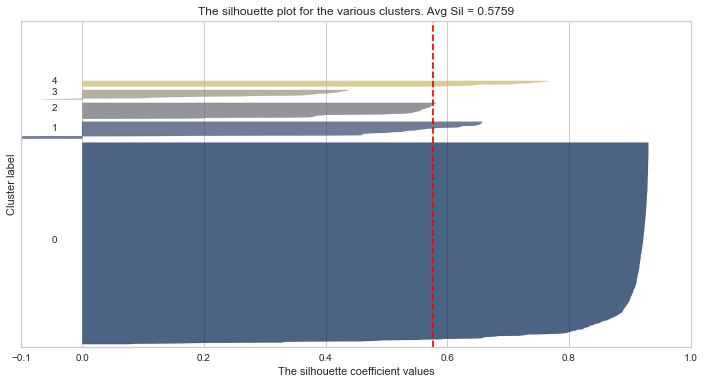

In [57]:
plot_silhoulette_clusters(ndf,dbscan_model.labels_,5)

In [64]:
single_silhouette_score_5(ndf,dbscan_model.labels_,-1)

0.8904261508808977
0.41254771599212886
0.4914437706664902
0.2855811465792914
-0.334053551710511


<h2>Hierarchical Clustering</h2>

In [35]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [36]:
# from the hierarchical clustering defined by the given linkage matrix and threshold return the cluster topology
def count_cluster_elements(data, threshold, criterion='distance'):
    count = {}
    clusters = fcluster(data, threshold, criterion)
    for c in clusters:
        count[c] = count[c]+1 if c in count else 1
    return count, clusters

# from flat clusters returns dictionary of dataframes representing the cluster
def get_dataframe(complete_df, flat_cluster):
    distinct_clusters = list(set(flat_cluster))
    sorted(distinct_clusters)
    cluster_index = {c:[] for c in distinct_clusters} 
    for i in range(len(flat_cluster)):
        cluster_index[flat_cluster[i]].append(i)
    clusters_df = {}
    indexes = df.index
    for c in distinct_clusters:
        elem = cluster_index[c]
        clusters_df[c] = df[df.index.isin([indexes[i] for i in elem])]
    return clusters_df

# plot values of elements in clusters
def plot_cluster_values(cdf, df_aux):
    attr = df_aux.columns
    clusters = [i for i in cdf]
    fig, axs = plt.subplots(1,len(attr),figsize=(20,5))
    for attr_index in range(len(attr)):
        mean_values = []
        max_values = []
        min_values = []
        for _, cluster_df in cdf.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
            max_values.append(cluster_df.describe()[attr[attr_index]][7])
            min_values.append(cluster_df.describe()[attr[attr_index]][3])
        axs[attr_index].bar(clusters, mean_values, color = ['b','g','r','y'])
        axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

Euclidean distance complete

dist = pdist(X=ndf, metric='euclidean')  # pair-wise distance: how every record is far from all others
dist = squareform(dist)                      # distance matrix given the vector dist


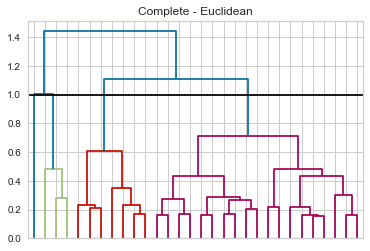

In [15]:
#ho usato ndf perché con l'altra standardizzazione non da risultati soddisfacenti (un solo cluster)
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
threshold_value = 1.0
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Complete - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [16]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 4 - [833, 111, 4, 1]
Silhouette score: 0.7496963840594253


In [110]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

[1:4] [2:1] [3:111] [4:833] 

single euclidean

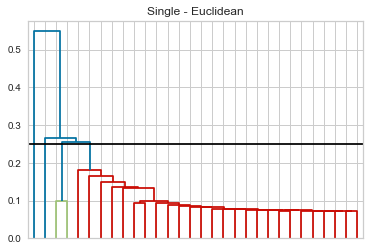

In [111]:
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
threshold_value = 0.25
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Single - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [112]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 4 - [945, 2, 1, 1]
Silhouette score: 0.7514839461383177


[1:2] [2:945] [3:1] [4:1] 

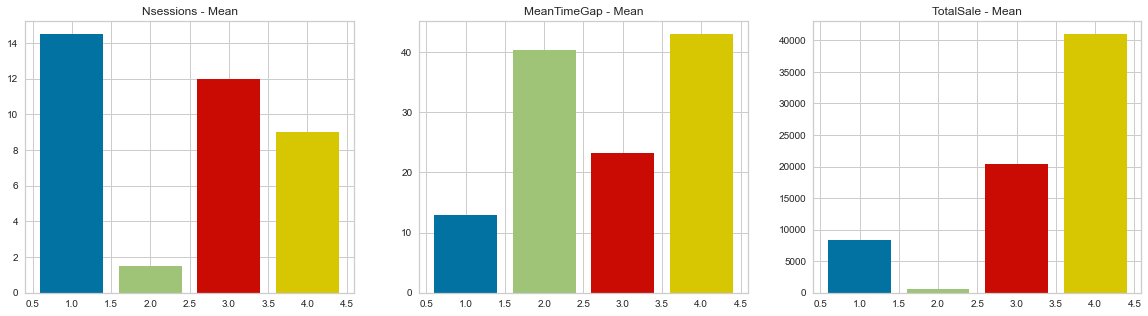

In [113]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

In [114]:
del data_dist, data_link, threshold_value, res, count, clusters, score, cdf


Average euclidean

In [115]:
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
threshold_value = 0.45
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Average - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [116]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 4 - [905, 39, 4, 1]
Silhouette score: 0.7307128144313043


In [117]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

[1:39] [2:905] [3:4] [4:1] 

In [118]:
del data_dist, data_link, threshold_value, res, count, clusters, score, cdf


Ward euclidean

In [37]:
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
threshold_value = 2.5
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Ward - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [38]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 4 - [681, 193, 58, 17]
Silhouette score: 0.7896135511695113


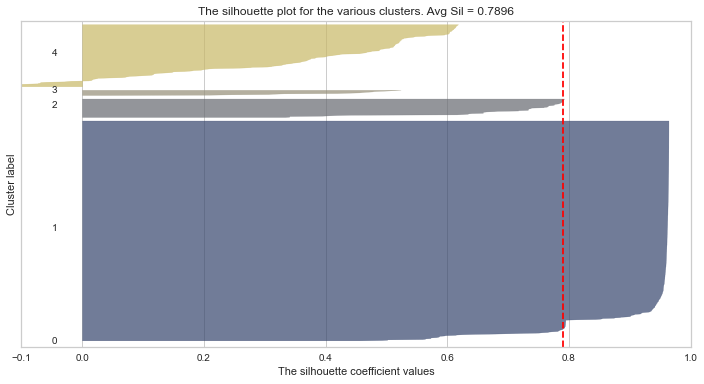

In [54]:
plot_silhoulette_clusters(ndf,clusters,5)

In [65]:
single_silhouette_score_4(ndf,clusters,-1)

nan
0.9332514800185936
0.6886538166356219
0.35170038477303783


C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

[1:681] [2:58] [3:17] [4:193] 

In [64]:
del data_dist, data_link, threshold_value, res, count, clusters, score, cdf


<h1> Agglomerative Clustering </h1>


In [43]:
def agg_clust(data, method):
    print(f"### {method} - euclidean ###", end="\n\n")
    for i in range(3, 5):
        complete = AgglomerativeClustering(n_clusters=i, linkage=method, affinity='euclidean', connectivity=None)
        complete.fit(data)
        hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
        print('Numero Cluster: ', i)
        print('Cluster', dict(zip(bins, hist)))
        print('Silhouette Score', silhouette_score(data, complete.labels_))
    return complete

In [48]:
agg_clust(ndf, "complete")
agg_clust(ndf, "single")
agg_clust(ndf, "average")
agg_clust(ndf, "ward")

### complete - euclidean ###

Numero Cluster:  3
Cluster {0: 5, 1: 833, 2: 111}
Silhouette Score 0.7515975235462594
Numero Cluster:  4
Cluster {0: 833, 1: 4, 2: 111, 3: 1}
Silhouette Score 0.7496963840594253
### single - euclidean ###

Numero Cluster:  3
Cluster {0: 947, 1: 1, 2: 1}
Silhouette Score 0.7477651400387362
Numero Cluster:  4
Cluster {0: 945, 1: 2, 2: 1, 3: 1}
Silhouette Score 0.7514839461383177
### average - euclidean ###

Numero Cluster:  3
Cluster {0: 944, 1: 4, 2: 1}
Silhouette Score 0.7519083096708408
Numero Cluster:  4
Cluster {0: 905, 1: 4, 2: 1, 3: 39}
Silhouette Score 0.7307128144313043
### ward - euclidean ###

Numero Cluster:  3
Cluster {0: 210, 1: 681, 2: 58}
Silhouette Score 0.768385362540854
Numero Cluster:  4
Cluster {0: 193, 1: 17, 2: 58, 3: 681}
Silhouette Score 0.7896135511695113


AgglomerativeClustering(n_clusters=4)

In [44]:
a=agg_clust(ndf, "ward")

### ward - euclidean ###

Numero Cluster:  3
Cluster {0: 210, 1: 681, 2: 58}
Silhouette Score 0.768385362540854
Numero Cluster:  4
Cluster {0: 193, 1: 17, 2: 58, 3: 681}
Silhouette Score 0.7896135511695113


[0:193] [1:17] [2:58] [3:681] 

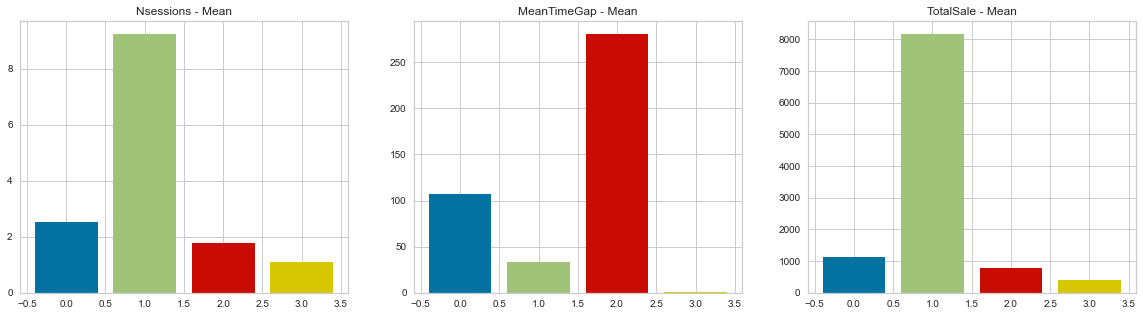

In [18]:
cdf = get_dataframe(df, a.labels_)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

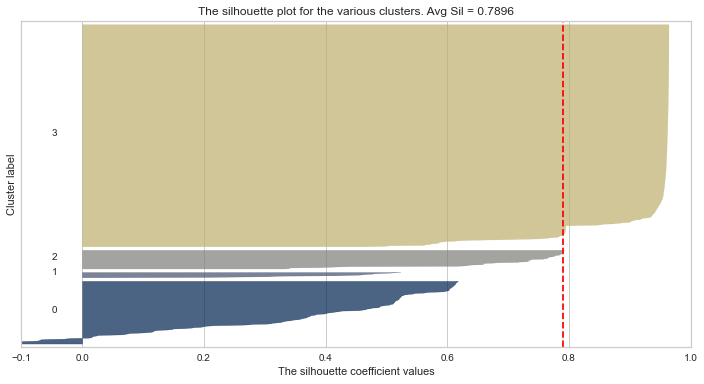

In [45]:
plot_silhoulette_clusters(ndf,a.labels_,4)

In [66]:
single_silhouette_score_4(ndf,a.labels_,-1)

0.34821719423264885
0.3912448420845129
0.6886538166356219
0.9332514800185936


In [51]:
cdf[0]['Label_09']='Loyalty'
cdf[1]['Label_09']='Wholesaler'
cdf[2]['Label_09']='Rarely'
cdf[3]['Label_09']='One Time'

<ipython-input-51-4bc0d44c9c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[0]['Label_09']='Loyalty'
<ipython-input-51-4bc0d44c9c78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[1]['Label_09']='Wholesaler'
<ipython-input-51-4bc0d44c9c78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<ul>
    <li>Cluster 0: Loyalty</li>
    <li>Cluster 1: Wholesaler</li>
    <li>Cluster 2: Rarely</li>
    <li>Cluster 2: One Time</li>
</ul>

In [53]:
frames=[cdf[0],cdf[1],cdf[2],cdf[3]]
result = pd.concat(frames)
result.reset_index()

Customer ID  MeanProdSale  TotalSale  TotalProd  MeanSpentSession  \
0        13085.0      3.425000    1096.80        376        274.200000   
1        13078.0      3.999608    2278.30        735        379.716667   
2        12682.0      3.172927     964.95        409        321.650000   
3        18087.0      3.130455     989.74        290        247.435000   
4        15413.0      3.945000    4513.42       1922       1504.473333   
..           ...           ...        ...        ...               ...   
944      18190.0      1.245625     192.42        240        192.420000   
945      13082.0      1.330000     192.18        210         96.090000   
946      15064.0      6.474762     324.99        126        324.990000   
947      14151.0      3.276957     352.05        176        352.050000   
948      12539.0      3.289710    5149.06       2128       2574.530000   

     MeanProdSession  TotalProdRet  MinProdSpent  MaxProdSpent  MeanTimeGap  \
0          94.000000             0         15.00        100.80    19.666667   
1         122.500000            13         10.00        130.80    68.400000   
2         136.333333             0          7.80        124.95   171.500000   
3          72.500000             0          8.48        204.00   112.000000   
4         640.666667             0        101.76        784.80   168.500000   
..               ...           ...           ...           ...          ...   
944       240.000000             0          5.04         19.80     0.000000   
945       105.000000             0         12.72        101.76     0.000000   
946       126.000000             0          5.04         50.00     0.000000   
947       176.000000             0         10.20         23.40     0.000000   
948      1064.000000             0          5.04        107.40     0.000000   

     Nsessions  DistinctProd  Label_09  
0          4.0          18.0   Loyalty  
1          4.0          34.0   Loyalty  
2          3.0          36.0   Loyalty  
3          4.0          20.0   Loyalty  
4          3.0          16.0   Loyalty  
..         ...           ...       ...  
944        1.0          16.0  One Time  
945        2.0           3.0  One Time  
946        1.0          21.0  One Time  
947        1.0          23.0  One Time  
948        2.0         104.0  One Time  

[949 rows x 13 columns]

In [54]:
result.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\customer\Segmented_Customer_2009.csv',header=True)